# Fast Neural Style Transfer with Instance Normalization
--------------------------------------------------------

##Style Transfer, [Slides🔗](https://docs.google.com/presentation/d/1ws0F6lSX3VSdO0aAJrVejjbeJdtRywZMxe-NU5PQGa0/edit?usp=sharing)

####Intuition

The goal of the style tranfer method is to apply a style or a pattern from an image, such as a painting of monet, to a content image, such as an image of a flower with the aim of achieving a stylized version of the input image.

The style transfer method takes a style image and a content image and defined 2 losses:
-  Style Loss that defines how closely the new image matches the original style image.
-  Content Loss that defines how well the content is preserved in the output image.

The two losses are optimized with the aim of minimizing the difference in cotent from the orginal and the output image. Over time the style of the content image looks more and more like the patten in the style image.

####Method

Initial techniques developed in 2016 titled Image Style Transfer Using Convolutional Neural Networks([Gatys et.al ,2016](https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Gatys_Image_Style_Transfer_CVPR_2016_paper.pdf)) are based on the idea of using a pre-trained CNN to extract feature representations from the content and style images, and then combining these representations to generate a new image.
The diagram below shows the main steps:
1. Choose a content image and a style image. 
2. Preprocess the images by resizing and normalizing them to the range [0, 1] and applying mean subtraction
3. Use a pre-trained CNN, such as VGG-19, to extract feature representations from the content and style images. Specifically, the feature maps of the CNN at different layers are used to capture different levels of information, such as low-level textures and high-level objects.
4. Define a loss function that measures the difference between the feature representations of the generated image, the content image, and the style image. The loss function typically consists of two components: a content loss that measures the difference between the feature representations of the generated and content images, and a style loss that measures the difference between the feature representations of the generated and style images.
5. Use an optimization algorithm, such as gradient descent, to minimize the loss function with respect to the pixels of the generated image. During optimization, the generated image is updated iteratively to minimize the loss function until convergence.
6. Postprocess the generated image by removing mean subtraction and rescaling it back to the original range [0, 255].

![Diagram by Gatys et al](https://drive.google.com/uc?export=view&id=1Sc0YSg0heJbtpdSOKJVgXIPjUxHs6WLQ)

The main **drawbacks** from using this technique included long wait times for optimization to run to **stylize a single image**. To overcome this issue, researchers in 2017 trained encoder, decoder models to speed up style transfer, making it real time.

##Perceptual losses for real-time style transfer and super-resolution by Johnson et al. (2016) 

Perceptual losses for real-time style transfer and super-resolution is a paper published by [Johnson et al in 2016](https://arxiv.org/abs/1603.08155) that proposed a novel approach to perform style transfer and super-resolution tasks in real-time. 

The system consists of two components:

Image Transformation Network:
> The image transformation network is a feed-forward ResNet (a CNN of residual blocks with skip connections) that takes the input image and produces a transformed output image with a desired style or resolution. The network is trained to minimize the perceptual loss, which is a combination of feature reconstruction loss (content) and style reconstruction loss (style), where these losses are defined using the feature maps computed by the loss network. 

The Loss Network 
> A pre-trained deep convolutional neural network (CNN) - VGG-16 - that is used to extract feature maps from the input image and the output image. The feature maps at different layers of the network represent different levels of abstraction in the image, with lower layers capturing low-level features like edges and textures, and higher layers capturing more abstract features like object shapes and semantic content.

A refresher on **Feature maps**:

Feature maps in VGG-16 are the result of convolving the input image with a set of learned convolutional filters. Each filter extracts a specific visual feature from the input image, such as edges, corners, textures, or object parts, and produces a corresponding feature map. As we move deeper into the network, the feature maps become more abstract and represent increasingly complex visual features. The *feature maps in the earlier layers capture low-level features such as edges and corners*, while the *feature maps in the later layers capture higher-level features such as object parts and textures*.



![Johnson et al.](https://drive.google.com/uc?export=view&id=1tfd67cIhapOeaDQk8S64zs8CGBuoQxKL)

The Image tranform net, tranforms an input image `x` into output image `y_output` via the mapping `y_output = f(x)`. Each loss function computes the loss: 

`l(y_output, yi_target)`, which measures the difference between the output image `y_output` and a target image `yi_target`.

The image transform network is trained using **stochastic gradient descent** to minimize a weighted combination of loss functions:

![Loss function](https://drive.google.com/uc?export=view&id=1bhz_iwvc5JTxRJFHUoOlcSwCisy2sRP8)


The loss network is used to define the `feature reconstruction loss`and the `style reconstruction loss`that measure differences in content and style
between images. For each input image x we have a content target yc and a style
target ys. 

`Feature reconstruction loss` (also known as content loss): 

From the paper: "The feature reconstruction loss is the (squared, normalized) Euclidean distance between feature representations. Instead of encouraging the pixels of the output image to exactly match the pixels of the target image y, we instead encourage them to have similar feature representations as computed by the loss network." In the image below you can see that the images from later layers preserve image content and spatial structure but color, texture, and exact shape are not.

![](https://drive.google.com/uc?export=view&id=1PB-fJN1-YjfAXWsJ5e_lmvSYjSegJgl0)


`Style Reconstruction Loss`: penalizes differences in style: colors, textures, common patterns. It is used to measure the difference between the style features of the input image and the style features of the generated output image. The CNN is used to extract feature maps at different layers, and the **Gram matrix** of each feature map is computed to represent the style features of the image. The style reconstruction loss is then computed as the difference between the Gram matrices of the style features of the input image and the generated output image.

`Pixel Loss` is the (normalized) Euclidean distance between the output image `y_output` and the target `y_target`.

`Total Variation Regularization` is the loss function defined to encourage spatial smoothness in the output image `y_output`. 

During training, the image transformation network is optimized to minimize the combined loss using backpropagation. The gradient of the loss with respect to the network parameters is computed using automatic differentiation, and the parameters are updated using an optimization algorithm such as stochastic gradient descent (SGD).

During inference or testing, the image transformation network takes the input image and produces the transformed output image directly without performing any backpropagation or optimization. The network is designed to be efficient and lightweight so that it can perform real-time style transfer and super-resolution on images or videos.

In summary, the loss network and image transformation network work together to enable real-time style transfer and super-resolution. The loss network is used to compute the perceptual loss, and the image transformation network is optimized to minimize the combined loss during training. During inference, the image transformation network produces the transformed output image directly.

##Later Developments
The method developed by Johnson et al., 2016 works for a single style at a time, requiring to train a new model for each style to apply.

In ***this colab notebook*** we show how the Fast Neural Style Transfer training process works for a ***single style***, using an image of Monet's paintings. 

To overcome the limitations of training separate models for each style, researchers have improved on this technique with the aim of generalizing a model which can **apply any style to any content image in real time**. Here is a link to the [colab notebook](https://colab.research.google.com/drive/1Cj5W8By0Q0B2wmqclC7s-X47alDKZyHE?authuser=2#scrollTo=uAR70_3wLEDB) they created. 

This architecture, developed by Ghiasi et al. (2017), defines an encoding of the style image as well and uses both the encoding of the original image and style image to produce the output image.

#Download Pretrained Models and example Images

In [ ]:
#Download the pretrained models
! git clone https://github.com/zoedesimone/fast-style-transfer

Cloning into 'fast-style-transfer'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 20 (delta 3), reused 15 (delta 1), pack-reused 0
Unpacking objects: 100% (20/20), 19.95 MiB | 14.13 MiB/s, done.


#Import libraries

In [ ]:
# Notebook display
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm.notebook import trange, tqdm_notebook

# PyTorch
import torch
from torch.optim import Adam
import torch.nn.functional as F
from torchvision import transforms
from torchvision.datasets import CocoDetection
from torch.hub import load_state_dict_from_url
from torch.utils.data import DataLoader, Dataset
from torch.nn import Module, Sequential, Upsample, ReflectionPad2d, Conv2d, InstanceNorm2d, ReLU, MaxPool2d

#Define constants and image processing functions

Here we define some utility functions to pre-process, post-process and visualize our images.

In [ ]:
# Image size
SIZE = 1280

# ImageNet statistics
MEAN = (0.485, 0.456, 0.406)
STD = (0.229, 0.224, 0.225)

# Determine device
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Pre-processing
def prep(image, size=SIZE, normalize=True, mean=MEAN, std=STD, device=DEVICE):
    resize = transforms.Compose([transforms.Resize(size, Image.LANCZOS),
                                 transforms.CenterCrop(size)])
    image = resize(image.convert('RGB'))
    if normalize:
        norm = transforms.Compose([transforms.ToTensor(),
                                   transforms.Normalize(mean, std)])
        return norm(image).unsqueeze(0).to(device)
    else:
        return image

# Post-processing
def post(tensor, mean=MEAN, std=STD):
    mean, std = torch.tensor(mean).view(3, 1, 1), torch.tensor(std).view(3, 1, 1)
    tensor = transforms.Lambda(lambda x: x * std + mean)(tensor.cpu().clone().squeeze(0))
    return transforms.ToPILImage()(tensor.clamp_(0, 1))

# Draw content, style and output images
def draw(input, content_image, style_image):
    output = post(input)

    clear_output(wait=True)
    plt.figure(figsize=(18, 6))

    ax1 = plt.subplot(1, 3, 1)
    ax1.imshow(prep(content_image, normalize=False))
    ax1.axis('off')
    ax1.set_title('Content Image')

    ax2 = plt.subplot(1, 3, 2)
    ax2.imshow(prep(style_image, normalize=False))
    ax2.axis('off')
    ax2.set_title('Style Image')

    ax3 = plt.subplot(1, 3, 3)
    ax3.imshow(output)
    ax3.axis('off')
    ax3.set_title('Output Image')

    plt.show()
    return output

#Upload content and style images
We train a model with the style of a Monet painting and test the style transfer on the photo of a cat.

In [ ]:
#Upload example files from the github repo
content_image = "fast-style-transfer/examples/images/content_image.jpeg"
style_image = "fast-style-transfer/examples/images/style_image.jpg"


# OR Manually upload images 
#files.upload()

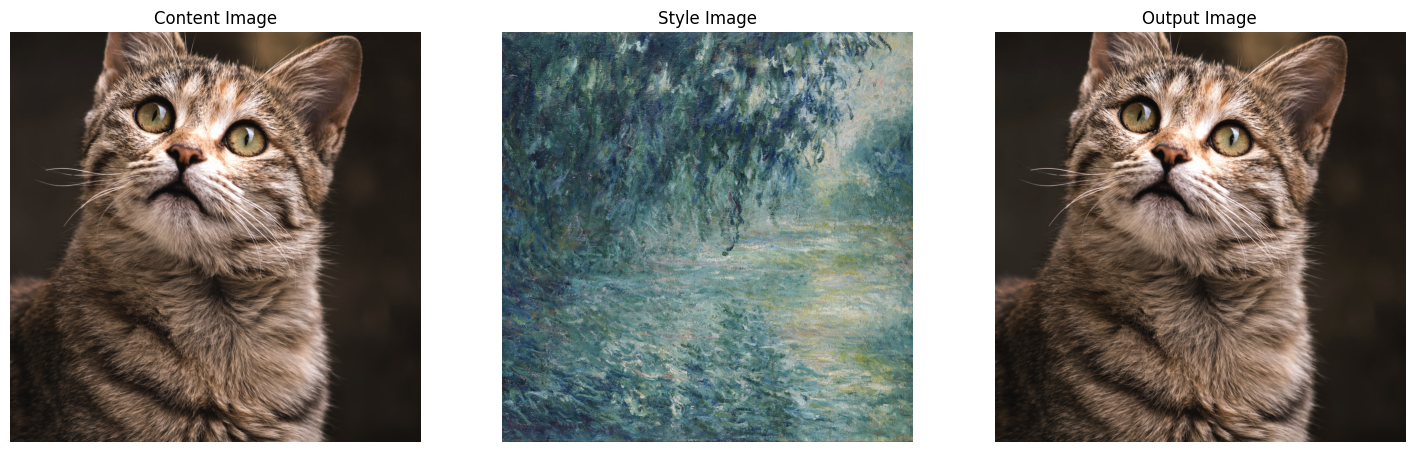

In [ ]:
# Open and prepare images
content_image, style_image = Image.open(content_image), Image.open(style_image)
content, style = prep(content_image), prep(style_image)

# Display images
_ = draw(content, content_image, style_image)

#Define content and style losses

In [ ]:
class ContentLoss(Module):
    """
    A class to define content loss in neural style transfer.
    Calculates Mean Squared Error (MSE) between features of content image
    and target image.
    """
    def forward(self, features, targets):
        loss = F.mse_loss(features, targets)
        return loss


class StyleLoss(Module):
    """
    A class to define style loss in neural style transfer.
    Calculates MSE loss between Gram matrices of the features of a style image
    and the target image.
    """
    def forward(self, features, GM_t):
        GM_f = self.gram_matrix(features)
        loss = F.mse_loss(GM_f, GM_t)
        return loss
    
    @staticmethod
    def gram_matrix(inputs):
        """
        Calculates Gram matrix of the input tensor using the batch matrix
        multiplication method. Returns input tensor's corresponding Gram matrix
        through reshaping the tensor, taking the dot product of the reshaped tensor
        with its transpose, then dividing the resulting matrix by the product of
        the number of channels and the spatial dimensions of the tensor.
        """
        BS, C, H, W = inputs.size()
        inputs = inputs.view(BS, C, H * W)
        GM = inputs.bmm(inputs.transpose(1, 2))
        return GM.div_(C * H * W)

#Gram matrix measures correlations between the features at each layer of the pretrained CNN
#Gram matrix of the style image is computed once and used as a target Gram matrix for the rest of the optimization process

#Define Image Transformation Network with nearest neighbour upsampling, instead of transposed convolutions, for better performance

In [ ]:
class ConvBlock(Module):
    """
    Defines a convolutional block with optional upsampling, normalization, and ReLU
    activation. Initializes with an upsample layer, a sequential module containing
    a reflection padding layer, followed by a convolutional layer, optional norm layer,
    and ReLU activation.
    """
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, upsample=False, norm=True, relu=True):
        super().__init__()

        self.upsample = Upsample(scale_factor=2) if upsample else None
        self.conv_block = Sequential(ReflectionPad2d(kernel_size // 2), Conv2d(in_channels, out_channels, kernel_size, stride))
        self.norm = InstanceNorm2d(out_channels, affine=True) if norm else None
        self.relu = ReLU(inplace=True) if relu else None

    def forward(self, x):
        """
        Checks if upsample is True, then applies it to the input tensor x. Passes tensor
        through conv_block that contains the padding, conv, norm, and activation layers,
        returning a tensor.
        """
        if self.upsample:
            x = self.upsample(x)
        conv = self.conv_block(x)
        if self.norm:
            conv = self.norm(conv)
        if self.relu:
            conv = self.relu(conv)
        return conv


class ResBlock(Module):
    """
    Defines a residual block containing 2 ConvBlock modules with 3x3 kernel
    sizes and ReLU activations. Takes in the number of channels.
    """
    def __init__(self, channels):
        super().__init__()
        
        self.conv_blocks = Sequential(ConvBlock(channels, channels, kernel_size=3),
                                      ConvBlock(channels, channels, kernel_size=3, relu=False))

    def forward(self, x):
        """
        Passes input tensor x through the ConvBlock modules and adds the resulting
        tensor to the input tensor to obtain the residual output.
        """
        return self.conv_blocks(x) + x


class ImageTransformationNetwork(Module):
    """
    Defines a neural network for image transformation, consisting of several
    ConvBlock and ResBlock modules.
    This network is designed for image transformation tasks, such as style transfer,
    where the input image is passed through a series of ConvBlock and ResBlock modules
    to generate a transformed output image with the desired characteristics.
    """
    def __init__(self, num_res_blocks=5):
        super().__init__()

        self.transnet = Sequential(ConvBlock(3, 32, kernel_size=9, stride=1),
                                   ConvBlock(32, 64, kernel_size=3, stride=2),
                                   ConvBlock(64, 128, kernel_size=3, stride=2),
                                   *[ResBlock(128) for i in range(num_res_blocks)],
                                   ConvBlock(128, 64, kernel_size=3, upsample=True),
                                   ConvBlock(64, 32, kernel_size=3, upsample=True),
                                   ConvBlock(32, 3, kernel_size=9, norm=False, relu=False))

    def forward(self, x):
        return self.transnet(x)

#Define VGG-16

In [ ]:
class VGG16(Module):
    """
    Implements the VGG16 architecture for image classification and feature extraction.
    This implementation has frozen parameters, which means the network is used for feature extraction, and its
    weights are not updated during training.
    """
    def __init__(self):
        super().__init__()

        # Feature Extractor
        self.conv1_1 = Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv1_2 = Conv2d(64, 64, kernel_size=3, padding=1)
        self.pool1 =   MaxPool2d(kernel_size=2, stride=2)
            
        self.conv2_1 = Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv2_2 = Conv2d(128, 128, kernel_size=3, padding=1)
        self.pool2 =   MaxPool2d(kernel_size=2, stride=2)
            
        self.conv3_1 = Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv3_2 = Conv2d(256, 256, kernel_size=3, padding=1)
        self.conv3_3 = Conv2d(256, 256, kernel_size=3, padding=1)
        self.pool3 =   MaxPool2d(kernel_size=2, stride=2)
            
        self.conv4_1 = Conv2d(256, 512, kernel_size=3, padding=1)
        self.conv4_2 = Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv4_3 = Conv2d(512, 512, kernel_size=3, padding=1)
        self.pool4 =   MaxPool2d(kernel_size=2, stride=2)
            
        self.conv5_1 = Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_2 = Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_3 = Conv2d(512, 512, kernel_size=3, padding=1)
        self.pool5 =   MaxPool2d(kernel_size=2, stride=2)
        
        # Freeze Parameters
        for param in self.parameters():
            param.requires_grad = False

    def forward(self, x, out_layers):
        out = dict()
        
        out['conv1_1'] = F.relu(self.conv1_1(x))
        out['conv1_2'] = F.relu(self.conv1_2(out['conv1_1']))
        out['pool1'] = self.pool1(out['conv1_2'])

        out['conv2_1'] = F.relu(self.conv2_1(out['pool1']))
        out['conv2_2'] = F.relu(self.conv2_2(out['conv2_1']))
        out['pool2'] = self.pool2(out['conv2_2'])

        out['conv3_1'] = F.relu(self.conv3_1(out['pool2']))
        out['conv3_2'] = F.relu(self.conv3_2(out['conv3_1']))
        out['conv3_3'] = F.relu(self.conv3_3(out['conv3_2']))
        out['pool3'] = self.pool3(out['conv3_3'])

        out['conv4_1'] = F.relu(self.conv4_1(out['pool3']))
        out['conv4_2'] = F.relu(self.conv4_2(out['conv4_1']))
        out['conv4_3'] = F.relu(self.conv4_3(out['conv4_2']))
        out['pool4'] = self.pool4(out['conv4_3'])

        out['conv5_1'] = F.relu(self.conv5_1(out['pool4']))
        out['conv5_2'] = F.relu(self.conv5_2(out['conv5_1']))
        out['conv5_3'] = F.relu(self.conv5_3(out['conv5_2']))
        out['pool5'] = self.pool5(out['conv5_3'])

        return [out[layer] for layer in out_layers]

#Initialize networks and load VGG-16 pre-trained weights & biases

In [ ]:
vgg16 = VGG16().to(DEVICE)
transnet = ImageTransformationNetwork().to(DEVICE)

state = vgg16.state_dict()
pretrained_vgg16 = 'https://download.pytorch.org/models/vgg16-397923af.pth'
new_state_values = list(load_state_dict_from_url(pretrained_vgg16).values())

for i, key in enumerate(state):
    state[key] = new_state_values[i]

vgg16.load_state_dict(state)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 258MB/s]


<All keys matched successfully>

# Test the style transfer method using pretrained style models
We pretrain 2 models using the style image of Monet with 1 epoch `style1.pth`.

We expect that the output image will look like the initial image of the cat and will be in the style of the monet painting. The pretrained model below, takes about 1 hour to train on a single epoch, making it unfeasible to train larger models on Colab. We expect that with larger epochs and longer training time the model would output better results.

Let's take a look:

In [ ]:
pretrained_style = "fast-style-transfer/examples/trained-models/style1.pth"

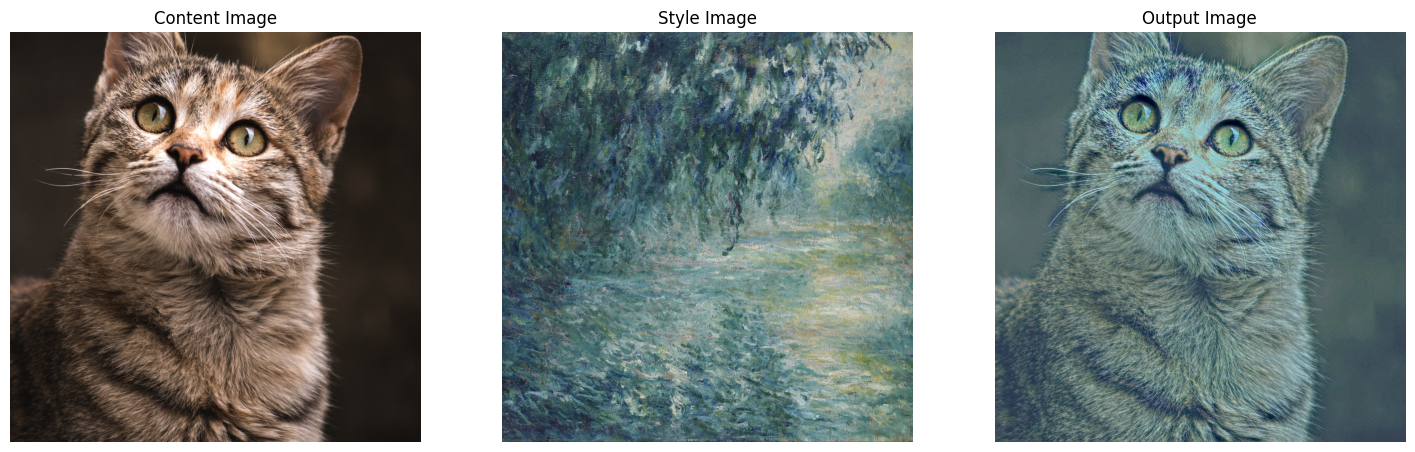

CPU times: user 2.87 s, sys: 1.15 s, total: 4.02 s
Wall time: 8.57 s


In [ ]:
%%time

def transfer_style(transnet, content):
    transnet.eval()
    with torch.no_grad():
        output = draw(transnet(content), content_image, style_image)
    return output

# Run
transnet.load_state_dict(torch.load(pretrained_style))
output = transfer_style(transnet, content)

# Train your own model

Load MS-COCO 2014 Train Dataset, which is a large-scale object detection, segmentation, and captioning dataset.

In [ ]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip
!wget http://images.cocodataset.org/zips/train2014.zip
!unzip annotations_trainval2014
!unzip train2014

image2tensor = transforms.Compose([transforms.Resize(256, Image.LANCZOS),
                                   transforms.CenterCrop(256),
                                   transforms.ToTensor(),
                                   transforms.Normalize(MEAN, STD)])

train_dataset = CocoDetection('train2014', 'annotations/instances_train2014.json', image2tensor)
train_loader = DataLoader(train_dataset, batch_size=4, collate_fn=lambda batch: torch.stack([x[0] for x in batch]))
clear_output()

##Pre-compute targets and initialize losses

In [ ]:
# Layers of content/style reconstruction
content_layers = ['conv2_2'] #layers in the VGG16 network to construct content image
style_layers = ['conv1_2', 'conv2_2', 'conv3_3', 'conv4_3'] #layers network to construct the style image
num_style_layers = len(style_layers) #total number of style layers to use in the style loss calculation

"""
Creates target style feature maps for each of the style layers specified. Input style image is
repeated four times to match the batch size of the input tensor to the VGG16 network. The result
is a list of Gram matrices of the style features for each layer.
"""

# Style targets
style_tensors = style.repeat(4, 1, 1, 1)#contains multiple copies of the style image to match the batch size of the content image
style_targets = [StyleLoss.gram_matrix(target) for target in vgg16(style_tensors, style_layers)] #list of Gram matricies 

# Loss functions
content_loss_fn = ContentLoss()
style_loss_fn = StyleLoss()

# Loss weights
CONTENT_WEIGHT = 1
STYLE_WEIGHT = 1e5
TV_WEIGHT = 1e-6

##Train ImageTransformationNetwork on the chosen style

In [ ]:
def train(transnet, train_loader, style_targets, content_loss_fn, style_loss_fn, epochs=1):
    """
    Train. The number of batches is determined from the length of the trained loader
    and Adam optimizer is instantiated with lr.
    """
    num_batches = len(train_loader)
    optimizer = Adam(transnet.parameters(), lr=1e-3)

    """
    Training starts over the specified number of epochs. The optimizer's gradient is reset,
    and the required variables are calculated using the pretrained network and the image
    transformation network.
    """

    for epoch in trange(epochs, desc='Epochs'):
        batches = iter(train_loader)
        for batch_idx in tqdm_notebook(range(1, num_batches + 1), desc='Batches', leave=False):
            batch = next(batches).to(DEVICE)
            images_in_batch = len(batch)

            optimizer.zero_grad()
            vgg16_out = vgg16(batch, content_layers)
            transnet_out = transnet(batch)
            vgg16_transnet_out = vgg16(transnet_out, style_layers)

            """
            Calculates the losses and applies the optimization step. The total loss is
            the weighted sum of the style loss, content loss, and total variation regularization.
            The backward pass is calculated, and the optimizer step is taken.
            """

            # Content Loss
            content_preds, content_targets = vgg16_transnet_out[1], vgg16_out[0]
            content_loss = CONTENT_WEIGHT * content_loss_fn(content_preds, content_targets)
            
            # Style Loss
            style_loss = 0
            for i in range(num_style_layers):
                style_loss += style_loss_fn(vgg16_transnet_out[i], style_targets[i][:images_in_batch])
            style_loss *= STYLE_WEIGHT

            """
            Encourage smoothness in the transformed image with total variation regularization.
            """
            
            # Total Variation Regularization
            diff_i = ((transnet_out[:, :, :, 1:] - transnet_out[:, :, :, :-1]).abs()).sum()
            diff_j = ((transnet_out[:, :, 1:, :] - transnet_out[:, :, :-1, :]).abs()).sum()
            tv_reg = TV_WEIGHT * (diff_i + diff_j)

            total_loss = style_loss + content_loss + tv_reg
            total_loss.backward()
            optimizer.step()

    # Save the trained weights
    torch.save(transnet.state_dict(), 'style.pth')

# Run
train(transnet, train_loader, style_targets, content_loss_fn, style_loss_fn)

Epochs:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/20696 [00:00<?, ?it/s]

# Inference step

## Transfer style

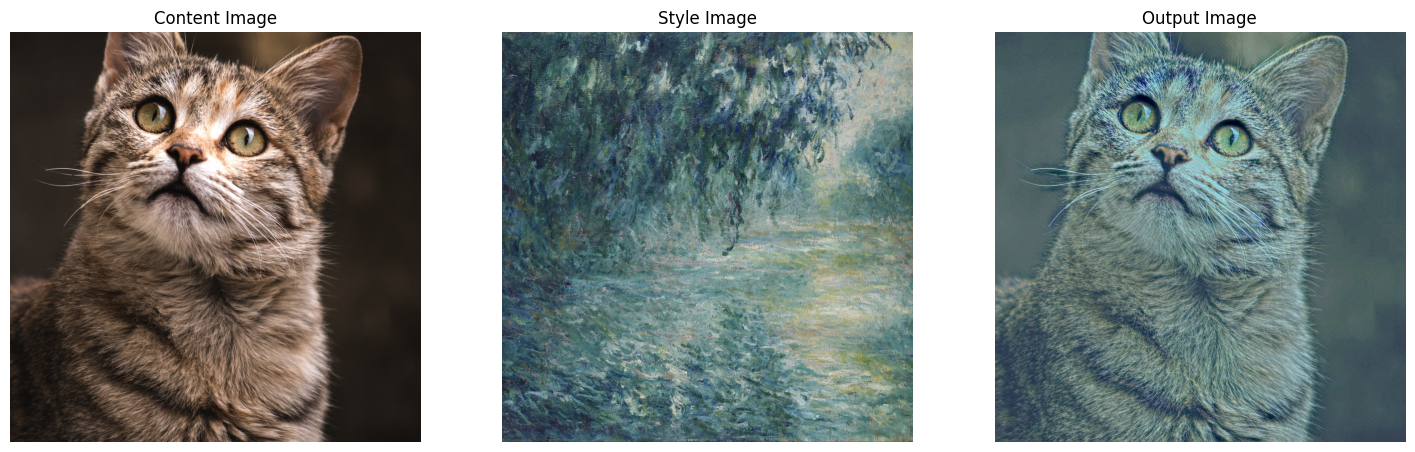

CPU times: user 1.65 s, sys: 1.22 s, total: 2.87 s
Wall time: 1.47 s


In [ ]:
%%time

def transfer_style(transnet, content):
    transnet.eval()
    with torch.no_grad():
        output = draw(transnet(content), content_image, style_image)
    return output

# Run
transnet.load_state_dict(torch.load('style.pth')) # Load the saved weights from the trained image transformation network
output = transfer_style(transnet, content) # Generate a stylized output image by transferring the style from the style image to the content image

## Save and download output

In [ ]:
output.save('output.png')
files.download('output.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>